# Welcome to the Motion Gestures Toolbox (Python) - Tutorial/Documentation

### Video visualisation
Videos can be watched as they are, but they can also be used to develop new visualisations to be used for analysis. The aim of creating such alternate displays from video recordings is to uncover features, structures and similarities within the material itself, and in relation to, for example, score material. Three useful visualisation techniques here are motion images, motion history images and motiongrams.

MGT can generate both dynamic and static visualizations, as well as some quantitative data:

- dynamic visualisations (video files)
    - motion video
    - motion history video
- static visualisations (images)
    - motion average image
    - motiongrams
    - videograms
- motion data (csv files)
    - quantity of motion
    - centroid of motion
    - area of motion

In the following we will try this ourselves, and look at the different types.

#### Starting off we will do a few imports, and the tutorial depends on these modules being installed/downloaded.

In [ ]:
import mgmodule
import cv2
from matplotlib import pyplot as plt

Now we create our mg (motion gestures) object, which takes the video and gives the video attributes and functions that can be used upon it to extract useful/fun videos, images and information. To save time, starttime and endtime of video relevant to analysis can be chosen as so: this will trim the piece of video of interest.

In [ ]:
mg = mgmodule.MgObject('dance.avi', starttime = 5, endtime = 15)

### Motion video analysis

By calling the motionvideo function, we will generate a number of files from the input video, in the same location as the source file.

These include:
- dance_motion.avi: the motion video that is used as the source for the rest of the analysis
- dance_mgx.bmp: a horizontal motiongram
- dance_mgy.bmp: a vertical motiongram
- dance_motion_com_qom.eps: an image file with plots of centroid and quantity of motion

We will examine each of these in a little more detail.

In [ ]:
mg.motionvideo()

In [ ]:
ls

In [ ]:
from IPython.display import Image
x = Image("dance_trim_mgx.png")
x


In [ ]:
y = Image("dance_trim_mgy.png")
y

In [ ]:
com_qom = Image("dance_trim_motion_com_qom.png")
com_qom

In [ ]:
#Press q to quit the video
mg.show('dance_trim_motion.avi')

### History tracking
Motion history tracking can be interesting, to study movement as a whole process. This is implemented as a history delay, storing the motion history of a given number of past frames into the current frame. history_length = integer of your choice, which will be the number of frames saved to the history tail.

When calling the function history(filename, history_length=20), a tail of 20 frames is saved to the current frame.

### History tracking
Motion history tracking can be interesting, to study movement as a whole process. This is implemented as a history delay, storing the motion history of a given number of past frames into the current frame. history_length = integer of your choice, which will be the number of frames saved to the history tail.

When calling the function history(filename, history_length=20), a tail of 20 frames is saved to the current frame.

In [ ]:
#mg = mgmodule.MgObject('dance.avi')
mg = mgmodule.MgObject('dance.avi', starttime = 5, endtime = 15, skip=5)
mg.history('dance_trim_skip.avi', history_length = 20)
mg.show('dance_trim_skip_history.avi')

### The new version starts here

Just import mgmodule...

In [1]:
import mgmodule

Make a video object:

In [2]:
yo = mgmodule.MgObject('dance.avi', starttime=5, endtime= 10, skip=2, contrast=50, brightness=50, crop='auto')

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Adjusting contrast and brightness: |████████████████████████████████████████| 100.0% Complete
Finding area of motion: |████████████████████████████████████████| 100.0% Complete
Rendering cropped video: |████████████████████████████████████████| 100.0% Complete


Show it:

In [4]:
yo.show()

Render the motion video:

Rendering motion video: |████████████████████████████████████████| 100.0% Complete


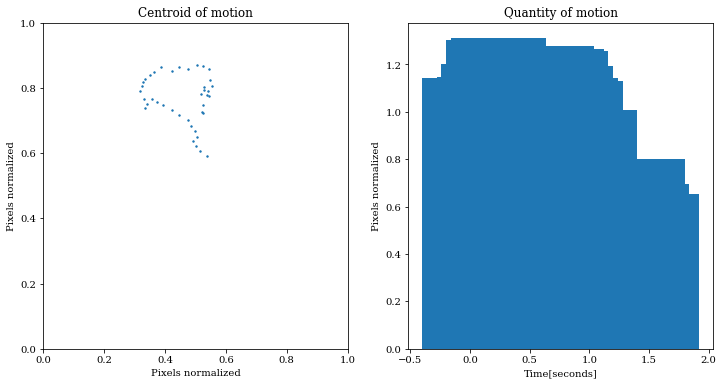

In [5]:
yo.motion()

Show the motion video:

In [7]:
yo.show(video="motion")

Render the history video:

In [8]:
yo.history()

Rendering history video: |████████████████████████████████████████| 100.0% Complete


Show the history video:

In [9]:
yo.show(video='history')

Render the history of the motion:

In [11]:
yo.motionhistory()

Rendering motion history video: |████████████████████████████████████████| 100.0% Complete


Show the motion history:

In [12]:
yo.show(video='motionhistory')

Render the average image:

In [13]:
yo.average()

Rendering average image: |████████████████████████████████████████| 100.0% Complete


### Skipping
In order to save time, skipping every other frame, or more, in the analysis can give you a faster analysis while still getting an idea of the motion. You can for example set this by adding "skip = 2", to skip two frames before including a frame in the analysis, then skipping two again. 

### Filtering

If you think there is too much noise in the output images or video, you may choose to use some other filter settings. 

Filtertypes availible are: 
’Regular’, turns all values below thresh to 0.
’Binary’ turns all values below thresh to 0, above thres to 1.
’Blob’ removes individual pixels with erosion method.


Try this:

In [ ]:
mg = mgmodule.MgObject('dance.avi', skip = 5, filtertype = 'Blob')
mg.motionvideo()

In [ ]:
ls

In [ ]:
mg.show('dance_skip_motion.avi')

### Cropping

If the video frame has big areas with no motion occuring, a lot of time could be saved if only the area with motion was used in the analysis. One useful tool developed for the pre-analysis is the crop = 'auto' input, which automatically finds the area with significant motion in the input video. The movement occuring has to be above a low threshold, as to not include irrelevant background motion from shadows, dust etc. Another mode is crop = 'manual', where you can manually mark a rectangle around your area of interest.

In [ ]:
mg = mgmodule.MgObject('dance.avi', skip = 5, filtertype = 'Blob', crop = 'auto')
mg.motionvideo()

In [ ]:
ls

In [ ]:
mg.show('dance_skip_crop_motion.avi')

In [ ]:
mg = mgmodule.MgObject('dance.avi')
mg.motionhistory()

In [ ]:
mg = mgmodule.MgObject('dance.avi')
mg.average_image()
from IPython.display import Image
avg = Image("dance_average.png")
avg